In [601]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [602]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive statistics

In [603]:
# Get overview data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


With overview table, we can realize that Glucose, BloodPressure, SkinThickness, Insulin, BMI contain zero values. These values are not acceptable and should be replaced with NaN.

In [604]:
# Check data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Overview, we can see that there are 2460 observations and 9 columns in the dataset.

Category variables include:

- Outcome

Numeric variables include:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

In [605]:
# Fill zero values with NaN
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

In [606]:
# Check overview data again
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2443.000000,2346.000000,1743.000000,1279.000000,2429.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,122.448219,72.263853,28.977051,154.100860,32.398724,0.491440,32.821951,0.390244
std,3.296458,30.231378,11.821553,10.189228,121.754763,6.958756,0.363917,11.251208,0.487904
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,73.000000,27.300000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,120.000000,32.300000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.000000,192.000000,36.600000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [607]:
# Check missing values
df.isnull().sum()

Pregnancies                    0
Glucose                       17
BloodPressure                114
SkinThickness                717
Insulin                     1181
BMI                           31
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

### Visualizing the distribution of data

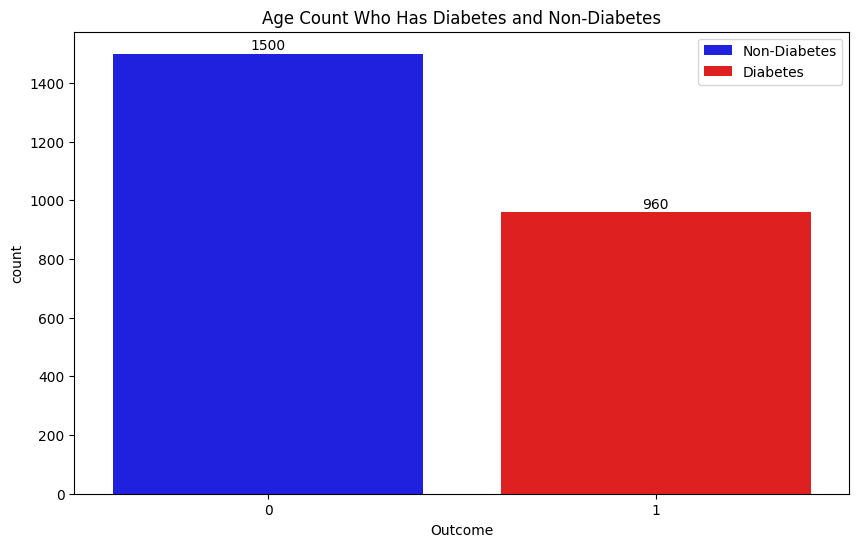

In [608]:
# Overview age count who has diabetes and non-diabetes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Outcome', data=df, palette=['blue', 'red'])
plt.legend(['Non-Diabetes', 'Diabetes'])
plt.title('Age Count Who Has Diabetes and Non-Diabetes')

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()-20), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

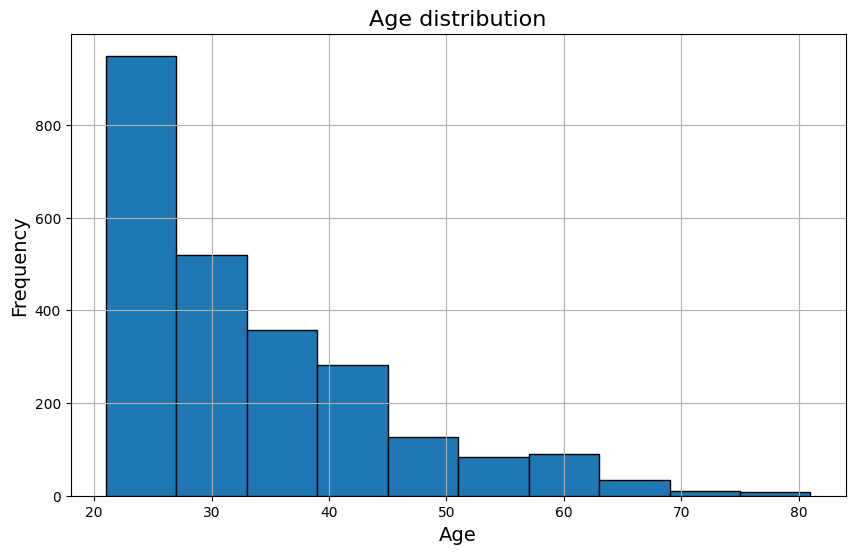

In [609]:
# Visualize the distribution of age 
# plot the hist of the age variable
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age distribution', fontsize=16)

# Create histogram
df['Age'].hist(edgecolor='black')


plt.show()

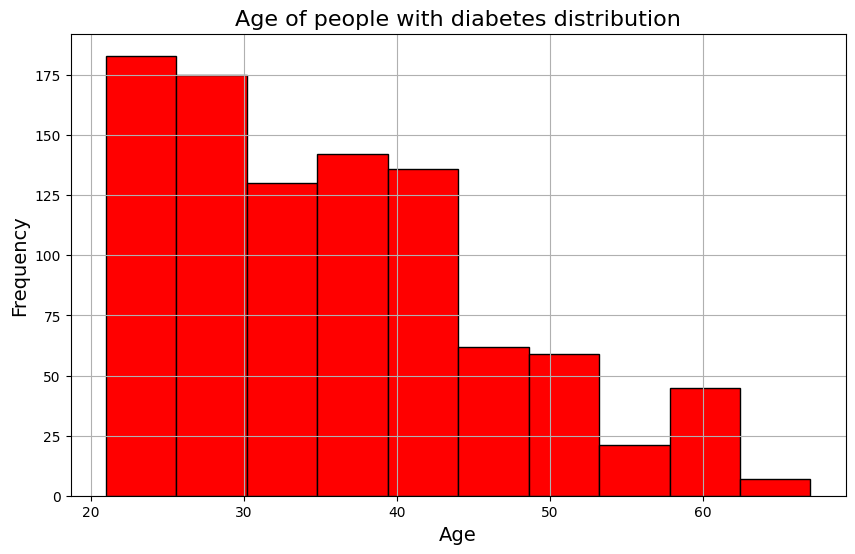

In [610]:
### Visualize the distribution of age of people with diabetes
# Visualize the distribution of age 
# plot the hist of the age variable
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people with diabetes distribution', fontsize=16)

# Create histogram
df[df['Outcome'] == 1]['Age'].hist(edgecolor='black',color='red')


plt.show()

Well, the patients are in groups of about 21 to 45 years old, and most of them are 21 to 30 years old.

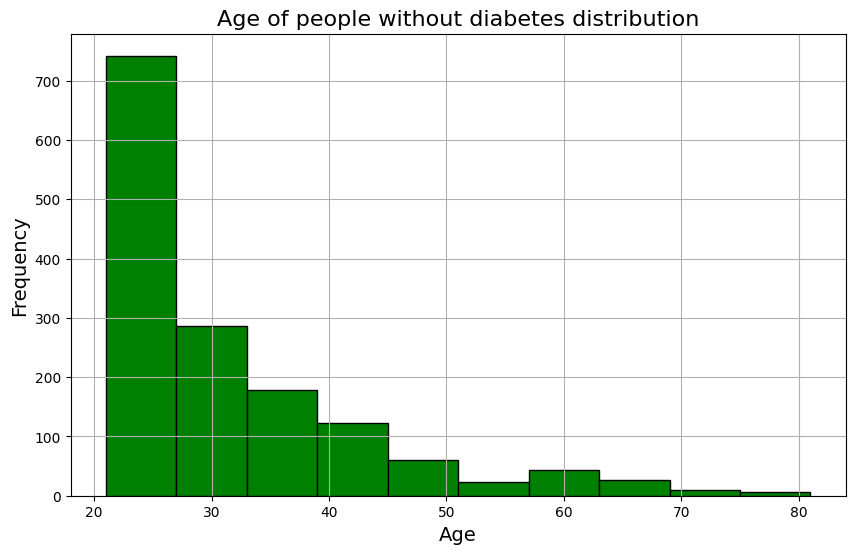

In [611]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df[df['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In this case, I want to use box plot to visualize the distribution of age and find out the outliers.

<Axes: xlabel='Outcome', ylabel='Age'>

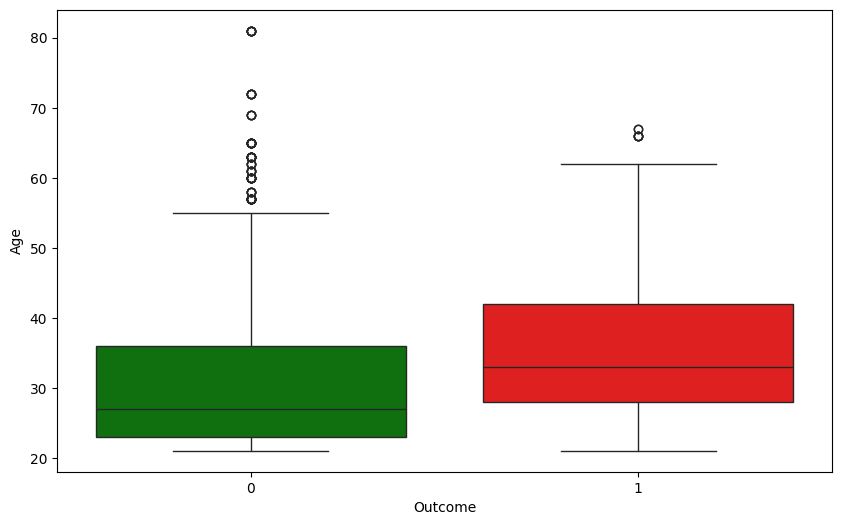

In [612]:
# Box plot for age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df, palette=['green', 'red'])

We can see that outliners of non diabetic patients are more than diabetic patients and the median of age of diabetic patients is higher than non diabetic patients.

In [613]:
# Find upper bound for age of people with diabetes
IQR = df[df['Outcome'] == 1]['Age'].quantile(0.75) - df[df['Outcome'] == 1]['Age'].quantile(0.25)
upper_bound = df[df['Outcome'] == 1]['Age'].quantile(0.75) + 1.5 * IQR
upper_bound

63.0

In [614]:
outliers = df[(df['Outcome'] == 1) & (df['Age'] > upper_bound)]
print('There are {} outliers in the age of people with diabetes'.format(outliers.shape[0]))
outliers

There are 7 outliers in the age of people with diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
221,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
363,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
641,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
1112,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
1586,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
1807,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1
2166,2,158.0,90.0,NaN,NaN,31.6,0.805,66,1


---

In [615]:
# Find upper bound for age of people with non-diabetes
IQR = df[df['Outcome'] == 0]['Age'].quantile(0.75) - df[df['Outcome'] == 1]['Age'].quantile(0.25)
upper_bound = df[df['Outcome'] == 1]['Age'].quantile(0.75) + 1.5 * IQR
upper_bound

54.0

In [616]:
outliers = df[(df['Outcome'] == 0) & (df['Age'] > upper_bound)]
print('There are {} outliers in the age of people with diabetes'.format(outliers.shape[0]))
outliers

There are 96 outliers in the age of people with diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0
30,5,109.0,75.0,26.0,NaN,36.0,0.546,60,0
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
140,3,128.0,78.0,NaN,NaN,21.1,0.268,55,0
...,...,...,...,...,...,...,...,...,...
2375,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
2408,3,128.0,78.0,NaN,NaN,21.1,0.268,55,0
2411,7,179.0,95.0,31.0,NaN,34.2,0.164,60,0
2433,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0


I want find the relationship between Insulin of diabetic patients and non diabetic patients. However, we can see that there are many NaN values in Insulin and I find out the relationship between Insulin and Glucose. As a result, I will use Glucose to predict Insulin. 

<Axes: >

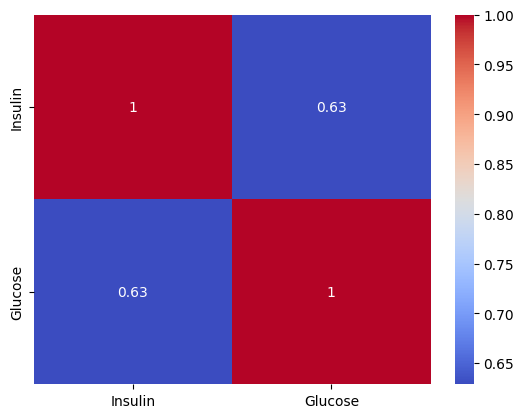

In [617]:
# Find the correlation between Insulin and Glucose
df_without_nana = df.dropna()
df_without_nana[['Insulin', 'Glucose']].corr() # Find the correlation 

# Visualize the correlation between Insulin and Glucose
sns.heatmap(df_without_nana[['Insulin', 'Glucose']].corr(), annot=True, cmap='coolwarm')


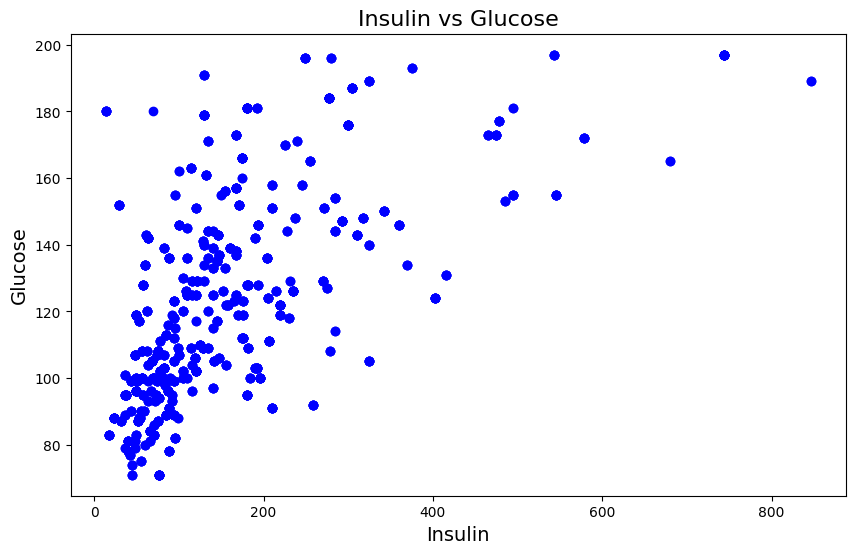

In [618]:
# Visualize using scatter for Insulin and Glucose
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana['Insulin'], df_without_nana['Glucose'], color='blue')
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Glucose', fontsize=14)
plt.title('Insulin vs Glucose', fontsize=16)
plt.show()

Well, I realize there are something stranger with Insulin. I will double check using box plot.

<Axes: xlabel='Outcome', ylabel='Insulin'>

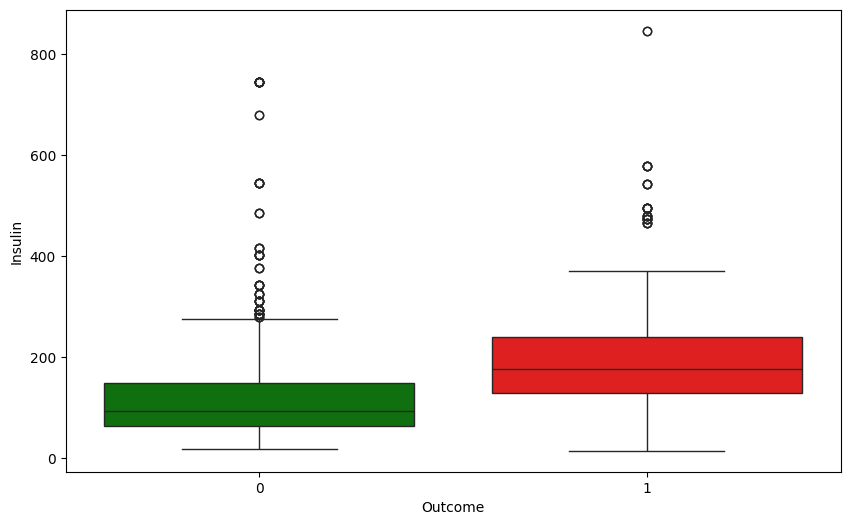

In [619]:
# Insulin box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette=['green', 'red'])

In [620]:
# 5 number summary for Insulin of people with non- diabetes
df_without_nana[df['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean     130.159800
std      116.279091
min       18.000000
25%       63.000000
50%       92.000000
75%      148.000000
max      744.000000
Name: Insulin, dtype: float64

In [621]:
# 5 number summary for Insulin of people with diabetes
df_without_nana[df['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     197.404711
std      119.750156
min       14.000000
25%      129.000000
50%      175.000000
75%      240.000000
max      846.000000
Name: Insulin, dtype: float64

From research, I find out that Insulin of normal people after consuming a glucose-rich drink is 16-166 mu U/ml and the diabetes patients have Insulin level will be less than 180 mu U/ml.
Link: https://emedicine.medscape.com/article/2089224-overview?form=fpf

In [622]:
# Find outliers for Insulin of people with non-diabetes
df_without_nana[(df['Outcome'] == 0) & (df['Insulin'] > 148)] # Find outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
35,4,103.0,60.0,33.0,192.0,24.0,0.966,33,0
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0
73,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0
91,4,123.0,80.0,15.0,176.0,32.0,0.443,34,0
...,...,...,...,...,...,...,...,...,...
2432,4,147.0,74.0,25.0,293.0,34.9,0.385,30,0
2443,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
2445,2,108.0,62.0,10.0,278.0,25.3,0.881,22,0
2447,1,157.0,72.0,21.0,168.0,25.6,0.123,24,0


In [623]:
# # For normal people
# # Replace outliners with random values from 62 to 166
# # Define the condition for outliers
# outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Insulin'] > 148)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()

# # Generate random integers between 62 and 166 for each outlier
# random_values = np.random.randint(90, 160, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values
    

In [624]:
# # For people with diabetes
# outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Insulin'] > 300)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()


# random_values = np.random.randint(161, 240, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

In [625]:
# # For people with diabetes
# outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Insulin'] < 80)

# # Count the number of outliers
# num_outliers = outliers_condition.sum()


# random_values = np.random.randint(100, 180, size=num_outliers)

# # Replace outliers with the random values
# df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

After filtering the outliers, double check the box plot of Insulin

In [626]:
# # Insulin box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Outcome', y='Insulin', data=df_without_nana, palette=['green', 'red'])
# plt.xlabel('Outcome', fontsize=14)
# plt.ylabel('Insulin', fontsize=14)
# plt.title('Insulin distribution after filtering outliers', fontsize=16)


In [627]:
# fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# # Insulin distribution for Outcome=0
# sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 0], x='Insulin', kde=True, color='blue', ax=axs[0], bins=20)
# axs[0].set_title('Insulin distribution for Non-Diabetes after filtering outliers', fontsize=16)
# axs[0].set_xlabel('Insulin', fontsize=14)
# axs[0].set_ylabel('Frequency', fontsize=14)

# # Insulin distribution for Outcome=1
# sns.histplot(data=df_without_nana[df_without_nana['Outcome'] == 1], x='Insulin', kde=True, color='red', ax=axs[1],bins=20)
# axs[1].set_title('Insulin distribution for Diabetes after filtering outliers', fontsize=16)
# axs[1].set_xlabel('Insulin', fontsize=14)
# axs[1].set_ylabel('Frequency', fontsize=14)

# plt.tight_layout()

In [628]:
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].describe()

count    467.000000
mean     197.404711
std      119.750156
min       14.000000
25%      129.000000
50%      175.000000
75%      240.000000
max      846.000000
Name: Insulin, dtype: float64

In [629]:
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].describe()

count    801.000000
mean     130.159800
std      116.279091
min       18.000000
25%       63.000000
50%       92.000000
75%      148.000000
max      744.000000
Name: Insulin, dtype: float64

----

Well, fill with random values maybe not a good idea. I will use group of age to fill the missing values of Insulin.

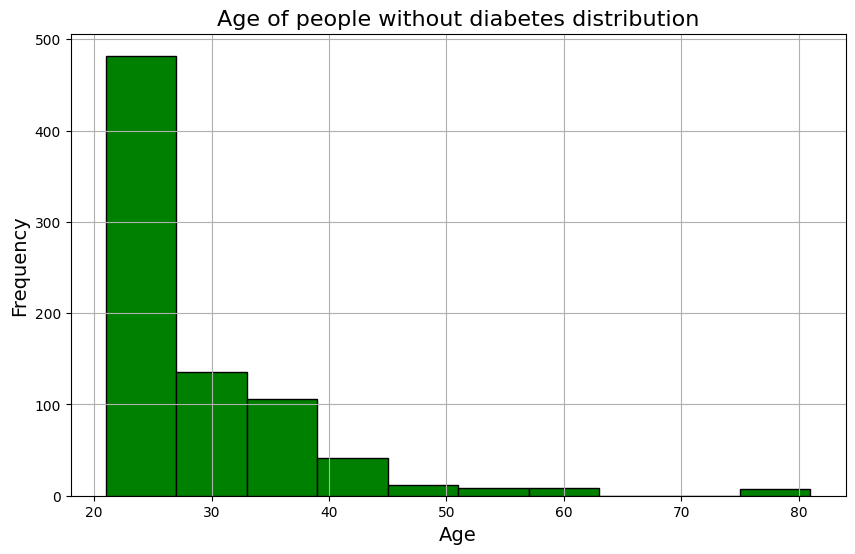

In [630]:
### Visualize the distribution of age of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [631]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[df['Outcome'] == 0][df_without_nana['Insulin'] < 148]

Text(0.5, 1.0, 'Insulin vs Age')

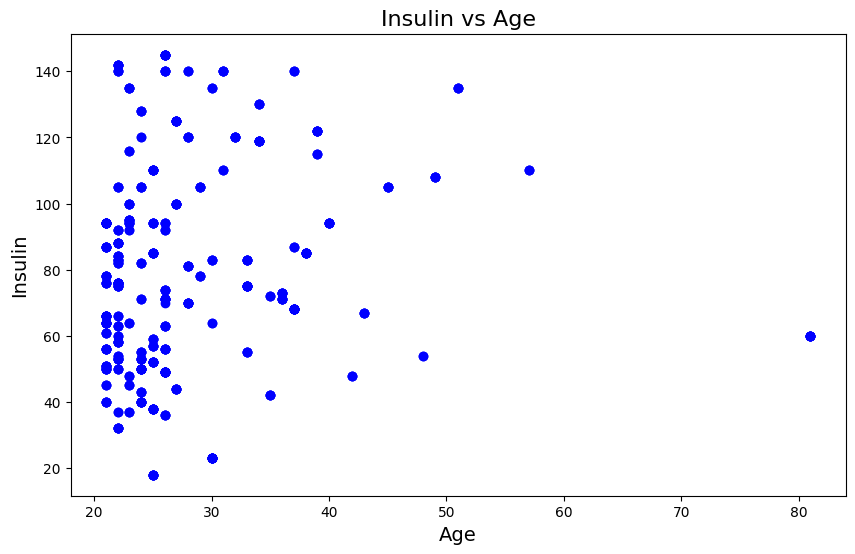

In [632]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

In [633]:
# Split age into 2 groups
# Group 1: 20 to 28 and compute 5 number summary
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] <= 28)]
group1['Insulin'].describe()

count    419.000000
mean      75.694511
std       30.174964
min       18.000000
25%       52.000000
50%       71.000000
75%       94.000000
max      145.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

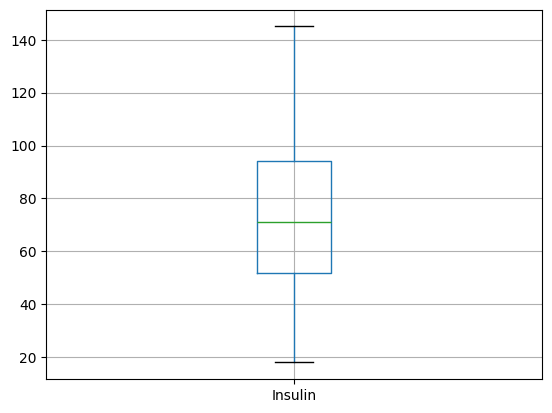

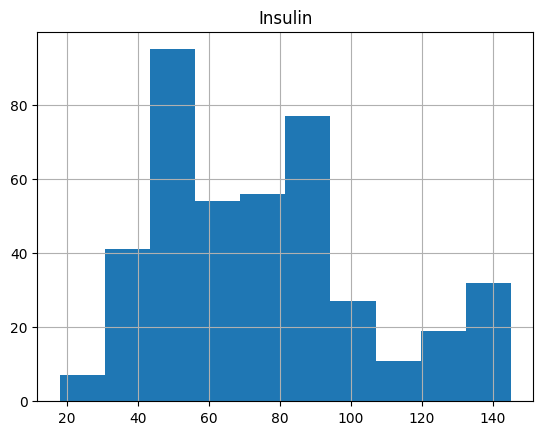

In [634]:
group1.boxplot(column='Insulin')
group1.hist(column='Insulin')

In [635]:
# Group 2: 28 to 90 and compute 5 number summary
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] > 28) & (df_without_nana_outliers['Age'] <= 90)]
group2['Insulin'].describe()


count    170.000000
mean      87.129412
std       30.951112
min       23.000000
25%       68.000000
50%       83.000000
75%      113.750000
max      140.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

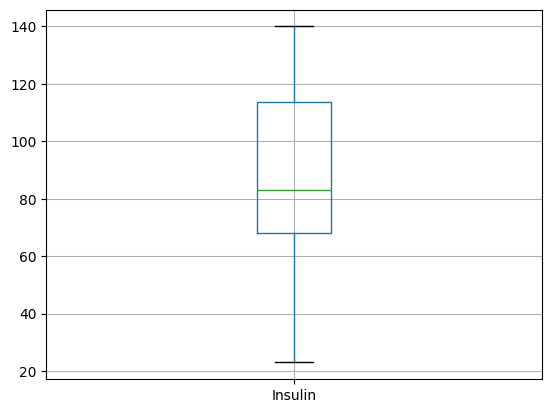

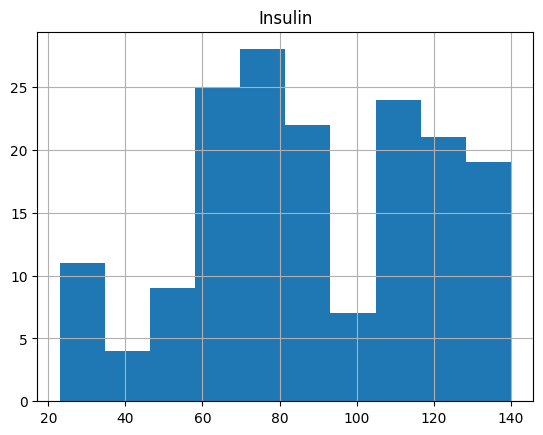

In [636]:
group2.boxplot(column='Insulin')
group2.hist(column='Insulin')

Fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1

In [637]:
# Without diabetes
# Group 1: 20 to 28
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] > 20) & (df_without_nana['Age'] < 28) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(60, 94, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 28 to 90
outliers_condition = (df_without_nana['Outcome'] == 0) & (df_without_nana['Age'] >= 28) & (df_without_nana['Age'] < 90) & (df_without_nana['Insulin'] > 130)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(68, 114, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

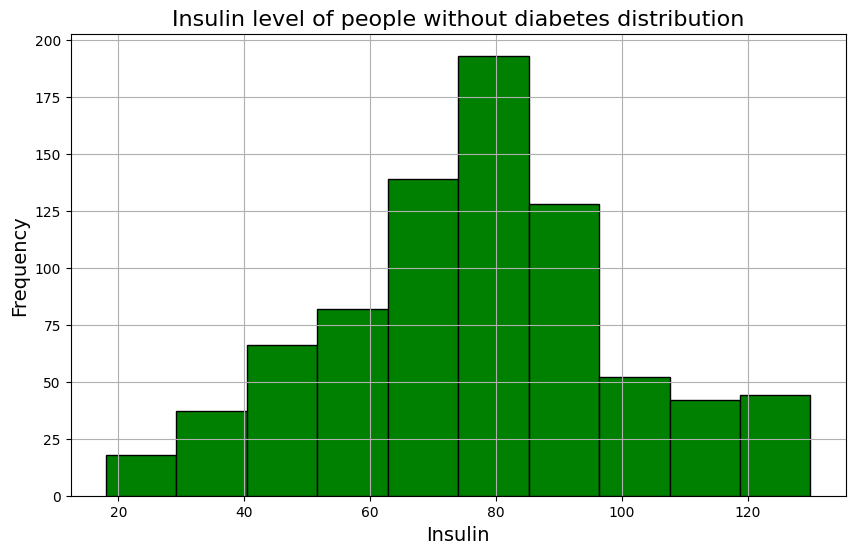

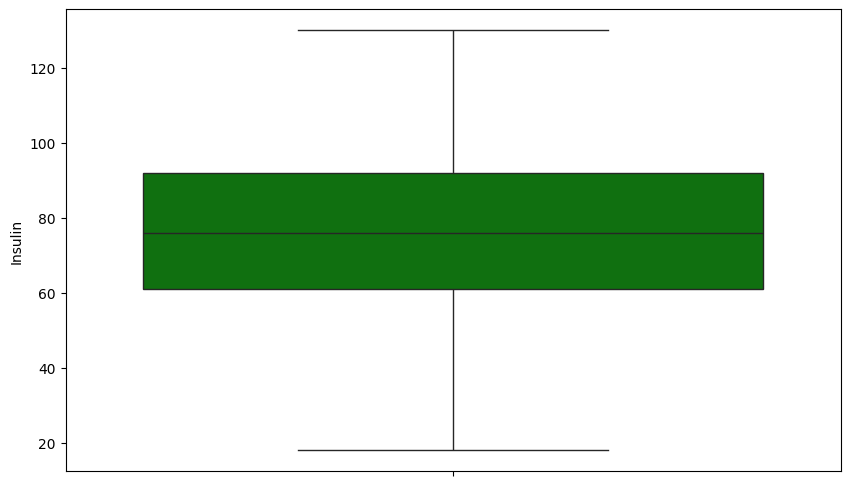

In [638]:
# Visualize the distribution of insulin of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people without diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'].hist(edgecolor='black',color='green', bins = 10)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people without diabetes')

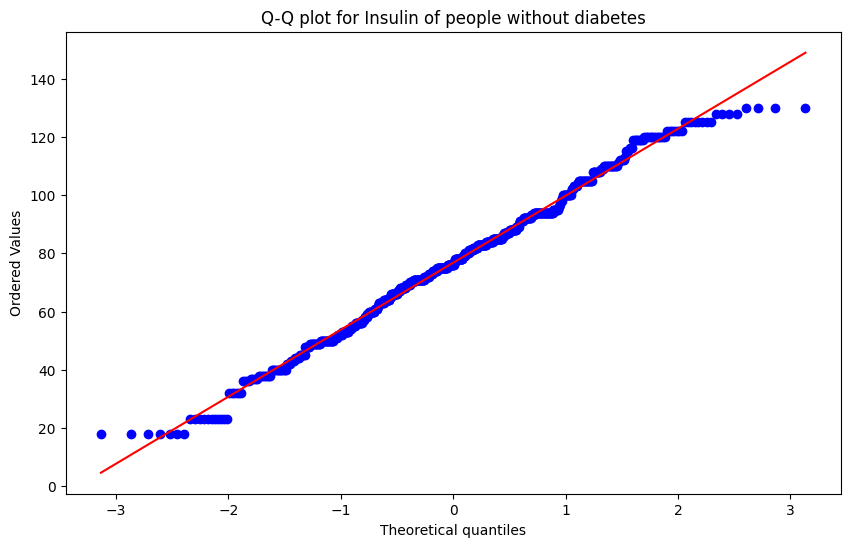

In [639]:
# qq plot for Insulin of people without diabetes
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 0]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people without diabetes')

Well, we can see that fill outliners with random values from 25th percentile to 75th percentile of Insulin for group 1 is a good idea. With qq plot, we can see that the distribution of Insulin is nearly normal, and we will assume that the distribution of Insulin is normal.

---

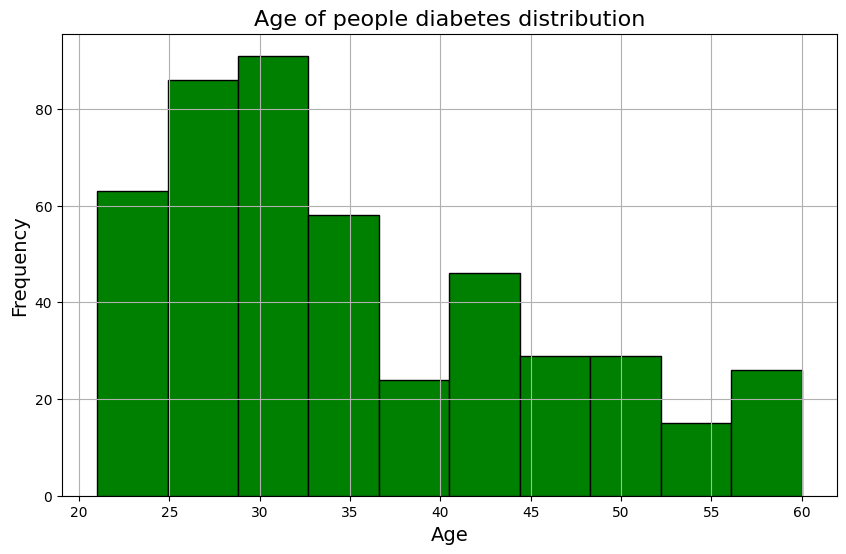

In [640]:

### Visualize the distribution of age of people diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age of people diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Age'].hist(edgecolor='black',color='green')


plt.show()

In [641]:
# Dropout outliers
df_without_nana_outliers = df_without_nana[(df_without_nana['Outcome'] == 0) & (df_without_nana['Insulin'] < 300) & (df_without_nana['Insulin'] > 80)]

Text(0.5, 1.0, 'Insulin vs Age')

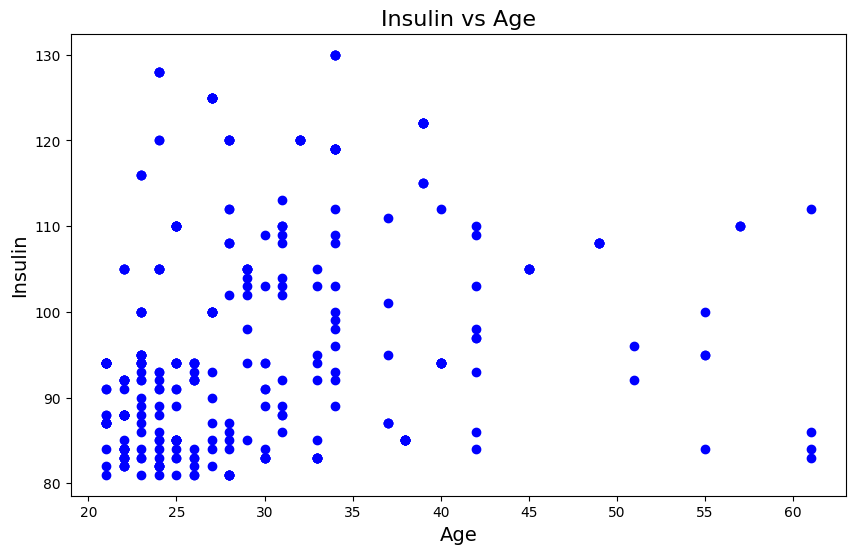

In [642]:
# Scatter plot for Insulin and Age
plt.figure(figsize=(10, 6))
plt.scatter(df_without_nana_outliers['Age'], df_without_nana_outliers['Insulin'], color='blue')
plt.ylabel('Insulin', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Insulin vs Age', fontsize=16)

I will divide 2 groups of age: group 1 (21 to 35) and group 2 (35 to 65)

In [643]:
group1 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 20) & (df_without_nana_outliers['Age'] < 35)]
group1['Insulin'].describe()

count    291.000000
mean      96.422680
std       13.251546
min       81.000000
25%       85.000000
50%       93.000000
75%      105.000000
max      130.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

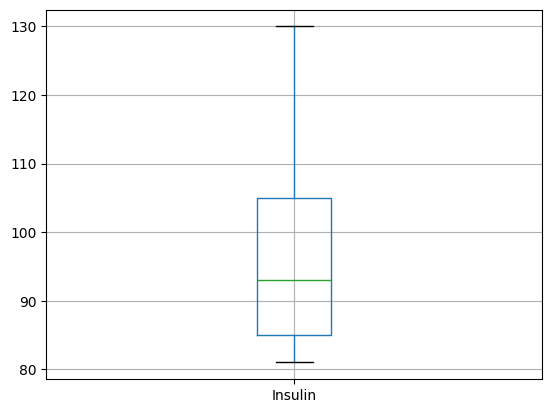

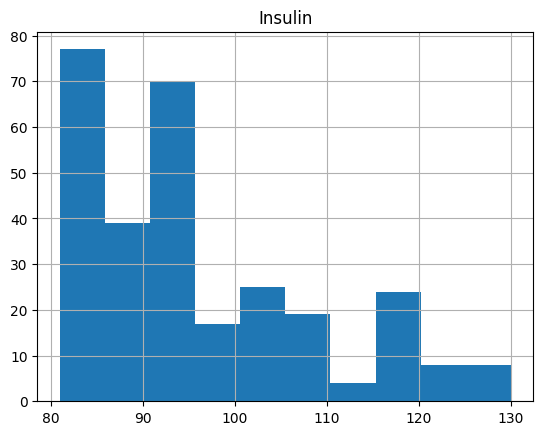

In [644]:
group1.boxplot(column='Insulin')
group1.hist(column='Insulin')

In [645]:
group2 = df_without_nana_outliers[(df_without_nana_outliers['Age'] >= 35) & (df_without_nana_outliers['Age'] <= 70)]
group2['Insulin'].describe()

count     65.000000
mean     100.015385
std       12.416587
min       83.000000
25%       87.000000
50%       97.000000
75%      110.000000
max      122.000000
Name: Insulin, dtype: float64

array([[<Axes: title={'center': 'Insulin'}>]], dtype=object)

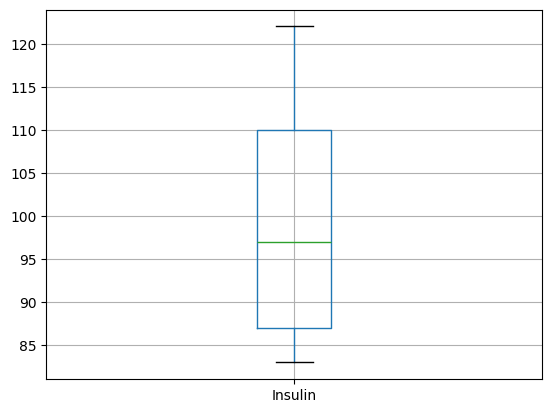

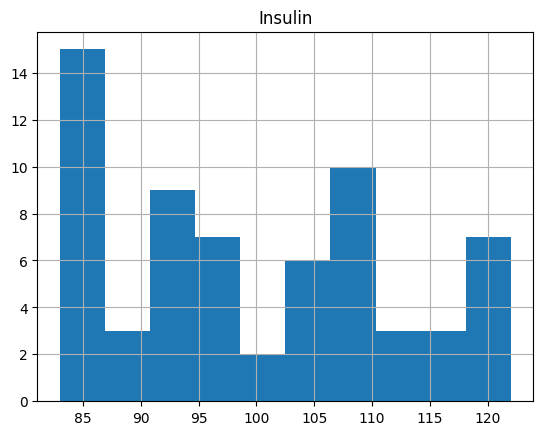

In [646]:
group2.boxplot(column='Insulin')
group2.hist(column='Insulin')

In [647]:
# With diabetes
# Group 1: 21 to 35
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 21) & (df_without_nana['Age'] < 35) & (df_without_nana['Insulin'] > 300)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(95, 115, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

# Group 2: 35 to 80
outliers_condition = (df_without_nana['Outcome'] == 1) & (df_without_nana['Age'] >= 35) & (df_without_nana['Age'] <= 70) & (df_without_nana['Insulin'] > 300)
num_outliers = outliers_condition.sum()
random_values = np.random.randint(100, 120, size=num_outliers)
df_without_nana.loc[outliers_condition, 'Insulin'] = random_values

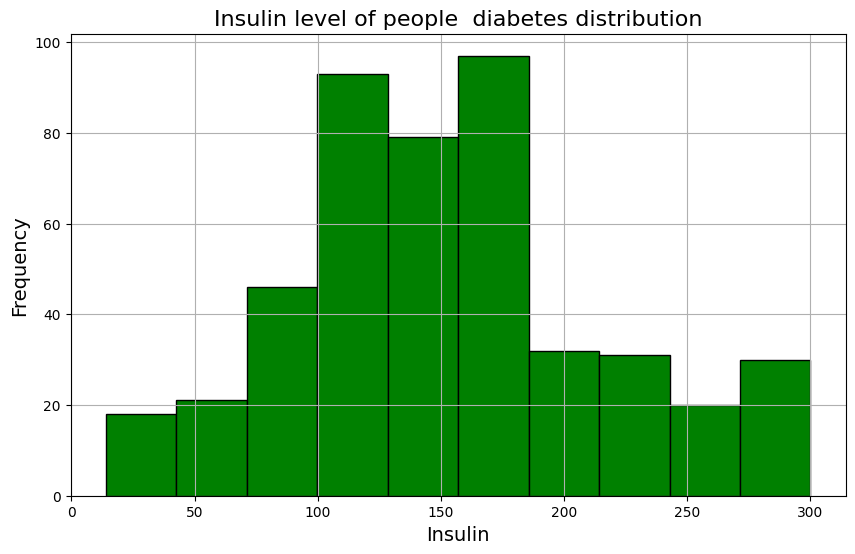

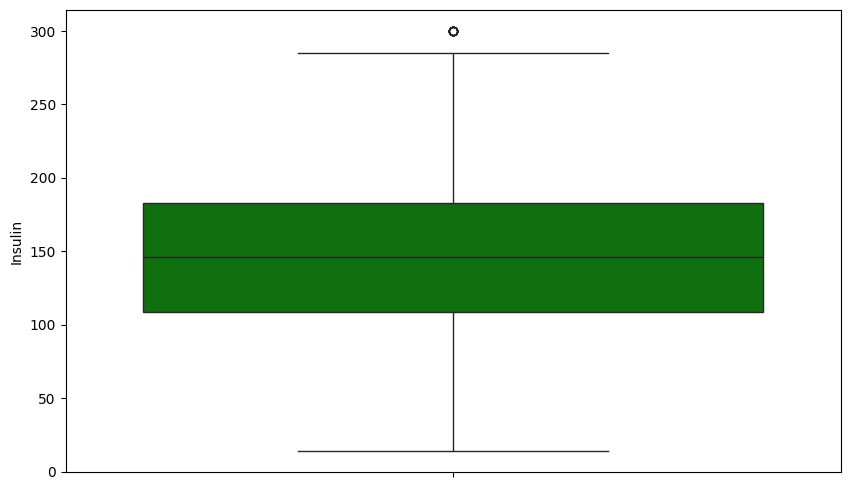

In [656]:
# Visualize the distribution of insulin of people without diabetes
plt.figure(figsize=(10,6))
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Insulin level of people  diabetes distribution', fontsize=16)

# Create histogram
df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'].hist(edgecolor='black',color='green', bins = 10)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], color='green')
plt.show()

Text(0.5, 1.0, 'Q-Q plot for Insulin of people without diabetes')

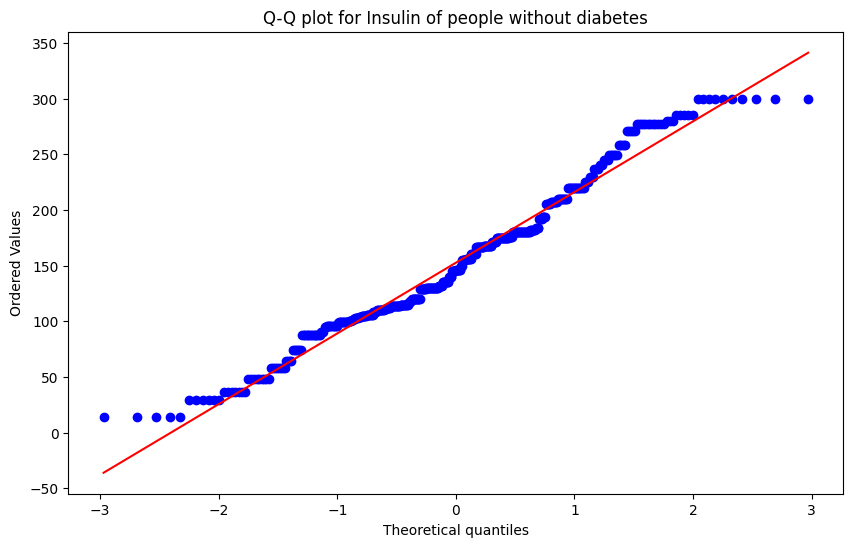

In [649]:
# qq plot for Insulin of people without diabetes
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(df_without_nana[df_without_nana['Outcome'] == 1]['Insulin'], dist="norm", plot=plt)
plt.title('Q-Q plot for Insulin of people without diabetes')